# Trabajo Final

## Alumno: Daniel Segura Dávila - Grupo B

## Caso: Encontrar el top 20 de viviendas de Barcelona más baratas y rentables en las que invertir

Descripción del dataset:

|Columna|Descripción|Key|
|--|--|--|
|id|Identificador numérico de la vivienda||
|price|Precio de mercado de la vivienda||
|currency|Moneda|Euros / Mes|
|latitude|Latitud de las coordenadas geográficas de la vivienda||
|longitude|Longitud de las coordenadas geográficas de la vivienda||
|sq_meters|Metros cuadrados de la vivienda||
|sq_meters_built|Metros cuadrados construídos de la vivienda||
|rooms|Número de habitaciones||
|bathrooms|Número de baños||
|balcony|Indicador si la vivienda tiene balcón|1, 0|
|terrace|Indicador si la vivienda tiene terraza|1, 0|
|exterior|Indicador si la vivienda tiene una orientación exterior o interior en el edificio|1, 0|
|orientation|Orientación principal de la vivienda|norte, sur, este, oeste|
|floor|Piso de la vivienda||
|rooftop|Indicador si la vivienda es un ático|1, 0|
|elevator|Indicador si el edificio de la vivienda tiene ascensor|1, 0|
|doorman|Indicador si el edificio tiene portero|1,0|
|pool|Indicador si la vivienda cuenta con piscina o derecho de uso de piscina|1,0|
|ac|Indicador si tiene aire acondicionado|1,0|
|heating|Indicador si tiene calefacción|bomba, electric, gas, individual|
|year_built|Año de construcción||
|quality|Indicador de calidad de la vivienda|2 - En buen estado|
|city|Ciudad de la vivienda||
|neighborhood|Barrio de la vivienda||
|dist_city_center|Distancia en kilómetros al centro de la ciudad||
|furniture|Indicador si la vivienda cuenta con mobiliario|1: Sin Equipar; 2: Cocina Equipada; 3: Amueblado|
|garage|Indicador si la vivienda tiene garage|1, 0|
|property_type|Tipo de vivienda||
|garden|Indicador si la vivienda cuenta con jardín|1,0|
|closest_station|Nombre de la estación de metro más cercana||
|dist_closest_station|Distancia en kilómetros a la estación de metro más cercana||
|created_at|Fecha de creación del anuncio||
|last_seen|Fecha última en la que el anuncio fue publicado en la web||

## Análisis exploratorio y limpieza de instancias

### Carga de las librerías y el dataset

In [184]:
# Library load
import os
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn packages
from sklearn.preprocessing import StandardScaler # Análisis de PCA
from sklearn import metrics # Calcula métricas para un modelo
from sklearn import tree # Cálculo de decision trees
from sklearn.tree import DecisionTreeClassifier # Generación de modelos de decision tree
from sklearn.ensemble import BaggingClassifier # Generación de modelos de bagging
from sklearn.ensemble import RandomForestClassifier # Generación de modelo de random forest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
from sklearn.preprocessing import OneHotEncoder # One Hot encoding de las variables categóricas

# Models
import catboost as cat
import ipywidgets

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix # Calcula la matriz de confusion 
from mlxtend.plotting import plot_confusion_matrix #plot de la matriz de confusión
from mlxtend.classifier import StackingClassifier #stacking classifier

# Shap library
import shap
# print the JS visualization code to the notebook 
shap.initjs()

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook

Como se puede observar, el dataset original está formado por filas y 33 columnas. La variable *price* es la objetivo y el resto son variables predictoras como:

- El barrio donde se ubica la vivienda
- La distancia al centro
- Metros cuadrados construidos
- Etc.

In [185]:
raw_data = pd.read_csv('processed_renting_Barcelona.csv', delimiter = ',')
raw_data.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,850,€/mes,41.401708,2.154077,52.0,55,2,1,NaN,...,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,725,€/mes,41.407221,2.135569,32.0,37,2,1,1.0,...,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,950,€/mes,41.411508,2.164608,NaN,72,3,1,NaN,...,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,750,€/mes,41.402256,2.140764,NaN,45,1,1,1.0,...,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,990,€/mes,41.405327,2.146929,NaN,45,1,1,NaN,...,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04


In [186]:
raw_data.shape

(8502, 33)

In [187]:
raw_data.columns

Index(['id', 'price', 'currency', 'latitude', 'longitude', 'sq_meters',
       'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace',
       'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'doorman',
       'pool', 'ac', 'heating', 'year_built', 'quality', 'city',
       'neighborhood', 'dist_city_center', 'furniture', 'garage',
       'property_type', 'garden', 'closest_station', 'dist_closest_station',
       'created_at', 'last_seen'],
      dtype='object')

### Limpieza de instancias

Como se puede apreciar, dicho dataset original contiene muchos valores nulos, por lo que a continuación se tratará de limpiar el conjunto de datos de la mejor manera posible, ya sea eliminando las instancias correspondientes o bien sustituyéndolas por algún valor como podría ser el 0.

In [188]:
raw_data.isnull().sum() / len(raw_data)

id                      0.000000
price                   0.000000
currency                0.000000
latitude                0.000000
longitude               0.000000
sq_meters               0.415785
sq_meters_built         0.000000
rooms                   0.000000
bathrooms               0.000000
balcony                 0.590096
terrace                 0.773230
exterior                0.078335
orientation             0.566455
floor                   0.231240
rooftop                 0.927429
elevator                0.030228
doorman                 1.000000
pool                    0.962244
ac                      0.519407
heating                 0.356387
year_built              0.528817
quality                 0.000000
city                    0.000000
neighborhood            0.000000
dist_city_center        0.000000
furniture               0.147259
garage                  0.954717
property_type           0.000235
garden                  0.994001
closest_station         0.000000
dist_close

Antes de eso, sin embargo, se actualizará el valor de las variables *price*, *rooms* y *bathrooms*. Como en este proyecto lo que se pretende es que la variable *sq_meters_built* no tenga tanto peso, esta se eliminará y las tres variables iniciales se dividirán por los metros cuadrados de la vivienda:

In [189]:
raw_data['price'] = round(raw_data['price'] / raw_data['sq_meters_built'], 2).astype(int)
raw_data['rooms'] = round(raw_data['rooms'] / raw_data['sq_meters_built'], 2)
raw_data['bathrooms'] = round(raw_data['bathrooms'] / raw_data['sq_meters_built'], 2)
raw_data.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,15,€/mes,41.401708,2.154077,52.0,55,0.04,0.02,NaN,...,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,19,€/mes,41.407221,2.135569,32.0,37,0.05,0.03,1.0,...,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,13,€/mes,41.411508,2.164608,NaN,72,0.04,0.01,NaN,...,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,16,€/mes,41.402256,2.140764,NaN,45,0.02,0.02,1.0,...,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,22,€/mes,41.405327,2.146929,NaN,45,0.02,0.02,NaN,...,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04


A continuación se eliminan algunas variables que no se tendrán en cuenta en el modelo, como la moneda o la latitud y longitud de la vivienda:

In [190]:
raw_data = raw_data[['price', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built', 'neighborhood', 'dist_city_center', 'property_type', 'dist_closest_station']]
raw_data.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station
0,15,0.04,0.02,NaN,NaN,1.0,norte,2.0,NaN,0.0,NaN,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111
1,19,0.05,0.03,1.0,NaN,1.0,sur,3.0,NaN,1.0,NaN,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561
2,13,0.04,0.01,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177
3,16,0.02,0.02,1.0,NaN,1.0,norte,4.0,NaN,1.0,NaN,NaN,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917
4,22,0.02,0.02,NaN,NaN,1.0,sur,3.0,NaN,1.0,NaN,NaN,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784


Existen algunas variables obligatorias en el formulario de alta de una vivienda en la plataforma de la cual se han extraído los datos, sin embargo hay otras que no. Como las variables *balcony*, *terrace*, *exterior*, *rooftop*, *elevator*, *pool* y *ac* tienen muchos valores vacíos, en este ejercicio se ha supuesto que si no están informadas es porque no existe (terraza, piscina, etc.). Por tanto:

In [191]:
features_to_null = ['balcony', 'terrace', 'exterior', 'rooftop', 'elevator', 'pool', 'ac']
for i in range(0,len(features_to_null)):
   raw_data[features_to_null[i]].fillna(0, inplace = True) 
raw_data.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station
0,15,0.04,0.02,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111
1,19,0.05,0.03,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561
2,13,0.04,0.01,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177
3,16,0.02,0.02,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917
4,22,0.02,0.02,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784


El caso del año de construcción de la vivienda es ligeramente diferente, ya que si se transforma la variable original por una categórica que cuente los años de construcción se pueden diferenciar claramente algunos clusters de viviendas similares, como las construidas hace 40 - 70 años. Por esta razón, se genera una variable categórica nueva:

In [192]:
raw_data['property_age'] = 2022 - raw_data['year_built']
raw_data.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,property_age
0,15,0.04,0.02,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,NaN
1,19,0.05,0.03,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,60.0
2,13,0.04,0.01,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,NaN
3,16,0.02,0.02,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,86.0
4,22,0.02,0.02,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,NaN


array([[<AxesSubplot:title={'center':'property_age'}>]], dtype=object)

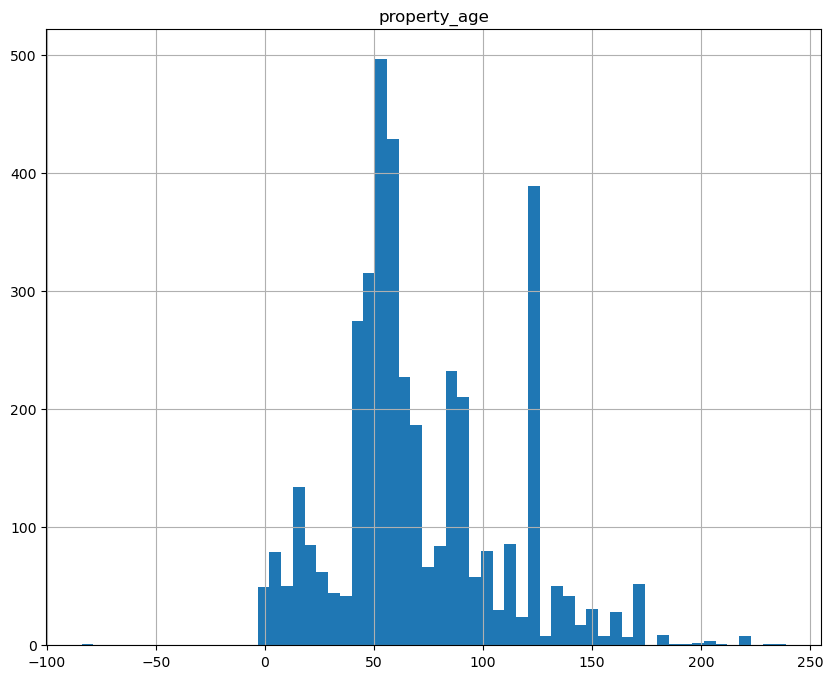

In [193]:
raw_data[['property_age']].hist(bins=60, figsize=(10, 8))

In [194]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
raw_data['property_age_cat'] = func(raw_data['property_age'])
raw_data = raw_data.drop(['property_age','year_built'], axis=1)
raw_data.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,neighborhood,dist_city_center,property_type,dist_closest_station,property_age_cat
0,15,0.04,0.02,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,Gràcia,2.026455,piso,0.094111,Unknown
1,19,0.05,0.03,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,40 - 70
2,13,0.04,0.01,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,El Baix Guinardó,2.663025,piso,0.188177,Unknown
3,16,0.02,0.02,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,70 - 120
4,22,0.02,0.02,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,Sarrià-Sant Gervasi,2.727149,piso,0.293784,Unknown


Después de este tratamiento inicial, las variables categóricas que se disponen son las siguientes. En caso de valores nulos, en este caso se sustituirán por un valor *unknown*:

In [195]:
features_to_unknown = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat', 'floor']

for i in range(0,len(features_to_unknown)):
    raw_data[features_to_unknown[i]].fillna("Unknown", inplace = True) 
raw_data.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,neighborhood,dist_city_center,property_type,dist_closest_station,property_age_cat
0,15,0.04,0.02,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,Unknown,Gràcia,2.026455,piso,0.094111,Unknown
1,19,0.05,0.03,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,Unknown,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,40 - 70
2,13,0.04,0.01,0.0,0.0,1.0,Unknown,4.0,0.0,1.0,0.0,1.0,Unknown,El Baix Guinardó,2.663025,piso,0.188177,Unknown
3,16,0.02,0.02,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,Unknown,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,70 - 120
4,22,0.02,0.02,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,Sarrià-Sant Gervasi,2.727149,piso,0.293784,Unknown


Finalmente se puede comprobar como se han eliminado todos los valores vacíos. El número de viviendas del dataset se mantiene igual, pero las variables predictivas han pasado de 32 a 17:

In [196]:
raw_data.isnull().sum() / len(raw_data)

price                   0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
orientation             0.0
floor                   0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
heating                 0.0
neighborhood            0.0
dist_city_center        0.0
property_type           0.0
dist_closest_station    0.0
property_age_cat        0.0
dtype: float64

In [197]:
raw_data.shape

(8502, 18)

In [198]:
rent_dataset = raw_data

### Análisis exploratorio

Como se puede observar:

- El 75% de las viviendas tienen un precio de alquiler por metro cuadradoigual o inferior a 17€.
- La distancia al centro y la distancia a la estación más cercana siguein una distribución normal, ya que mediana y media son muy similares.
- De media, 4 de cada 10 viviendas tiene balcón, 7 de cada 10 ascensor y 5 de cada 10 aire acondicionado.
- La presencia de piscina o terraza es muy baja.

In [199]:
rent_dataset.describe()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,dist_city_center,dist_closest_station
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000
mean,15.453305,0.029426,0.019048,0.409904,0.226770,0.811103,0.072571,0.663138,0.037756,0.480593,2.616749,0.392531
std,5.553929,0.013987,0.007362,0.491845,0.418767,0.391450,0.259447,0.472665,0.190616,0.499653,1.409102,0.290708
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062165,0.007875
25%,12.000000,0.020000,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.475110,0.225168
50%,14.000000,0.030000,0.020000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.481490,0.325357
75%,17.000000,0.040000,0.020000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.589782,0.453814
max,89.000000,0.080000,0.090000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.940761,3.177445


<AxesSubplot:xlabel='price'>

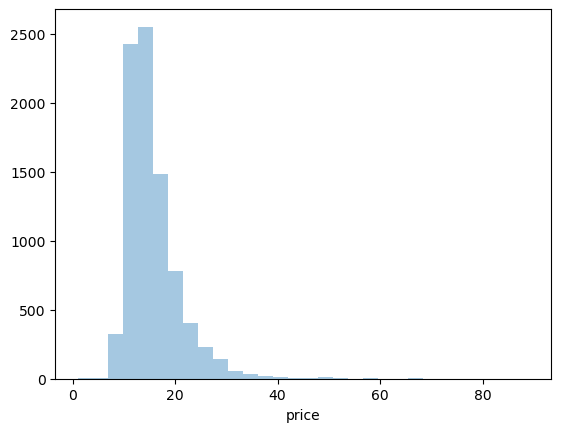

In [200]:
sn.distplot(rent_dataset['price'], kde = False, bins = 30)

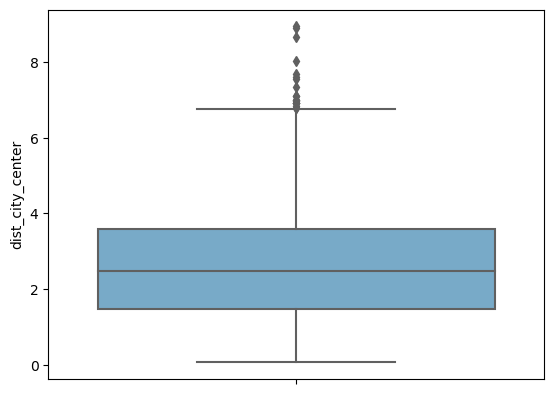

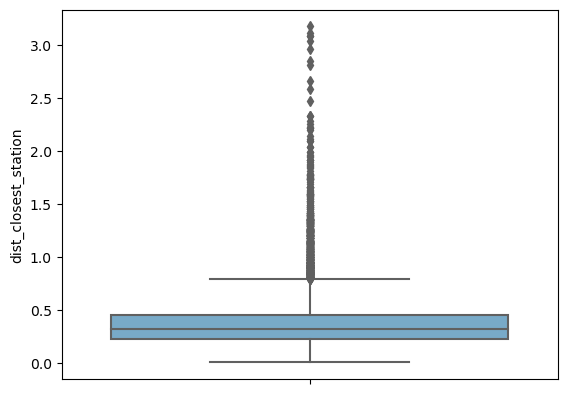

In [201]:
boxplot_variables = ['dist_city_center','dist_closest_station']

for i in boxplot_variables:
    sn.boxplot(y=rent_dataset[i], palette="Blues")
    plt.show()

El hecho de dividir el precio por m2 ha supuesto que no se observe una diferencia ´tan clara entre el aumento que supone disponer o de aire acondicionado o ascensor, aunque sí se puede apreciar una mayor concentración de viviendas con un precio más elevado cuando sí los tienen.

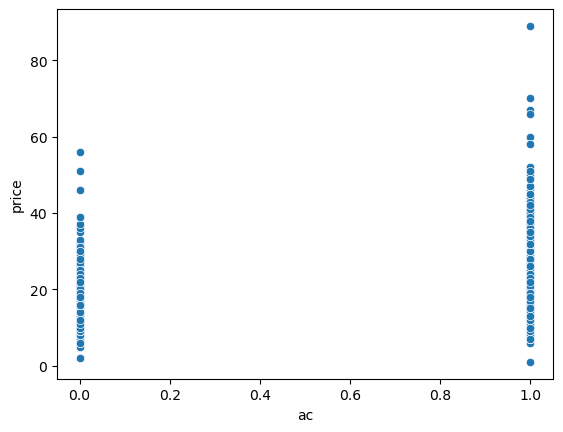

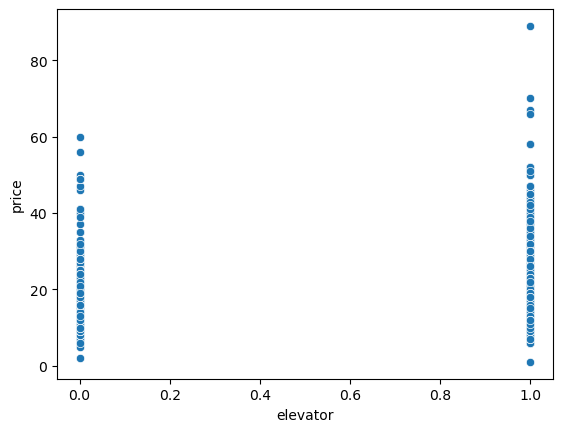

In [202]:
boxplot_variables = ['ac','elevator']

for i in boxplot_variables:
    sn.scatterplot(data=rent_dataset, x=i, y="price")
    plt.show()

Otra consecuencia de haber dividido el precio, el número de habitaciones y el de baños por los metros cuadrados es la mayor limitación a la hora de comprender el dataset, como por ejemplo se puede ver en el siguiente gráfico. Una vivienda de 50 m2 con una habitación y una de 100 m2 con dos tienen un ratio habitaciones/m2 de 0,02, pero son tipos de vivienda muy diferentes.

<AxesSubplot:xlabel='rooms', ylabel='count'>

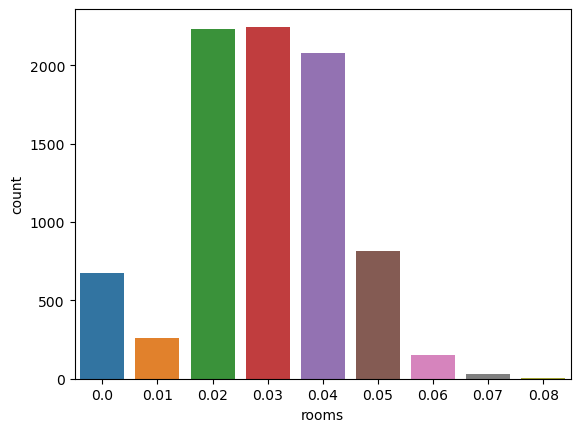

In [203]:
sn.countplot(x = 'rooms', data = rent_dataset)

Si se observar junto con el precio sí se puede obtener más información, porque indirectamente se puede saber si la vivienda del ejemplo anterior es más grande o no. En este caso, viviendas un ratio habitaciones/m2 más pequeño son más caras, algo normal ya que son viviendas más pequeñas y de las que se puede obtener más rentabilidad por metro cuadrado. Cuando pasan a ser muy grandes, como una vivienda de ratio 0,04 (5 baños y 175 m2), por ejemplo, el €/m3 comienza a bajar.

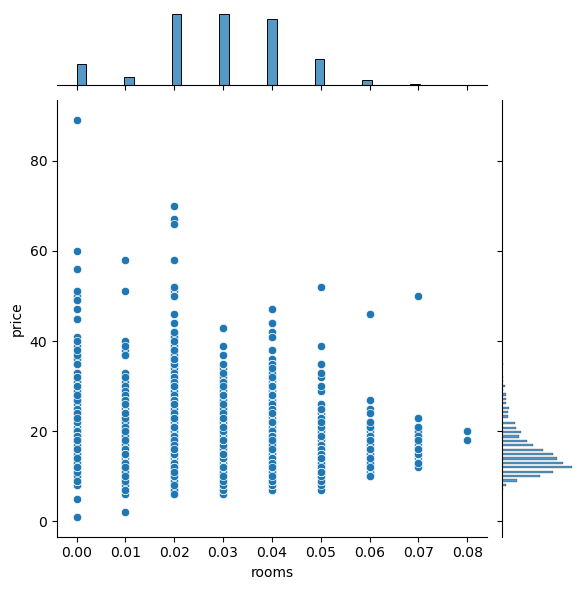

In [204]:
sn.jointplot(x = rent_dataset['rooms'], y = rent_dataset['price'], data = rent_dataset)

### ANOVA

Si se realiza un test ANOVA respecto al precio y las variables categóricas descritas anteriormente se puede observar que las más afectan al precio son:

- neighborhood   
- property_type   
- heating     
- property_age_cat    
- floor
- ac
- balcony
- exterior

Entre las que destacan:

- neighborhood
- ac
- property_type   

Y las que no:

- orientation
- elevator

In [205]:
cat_features = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat', 'floor', 'balcony',
               'terrace', 'exterior', 'rooftop', 'elevator', 'pool', 'ac']

In [206]:
# Test ANOVA
for i in range(0, len(cat_features)):
    model_def = 'price ~ ' + cat_features[i]
    anova_model = ols(model_def, data=rent_dataset).fit()
    aov_table = sm.stats.anova_lm(anova_model, typ=2)
    print(aov_table)

                     sum_sq      df          F         PR(>F)
neighborhood   43764.955568    75.0  22.507057  3.556900e-273
Residual      218458.006558  8426.0        NaN            NaN
                      sum_sq      df          F        PR(>F)
property_type   13261.265547     8.0  56.548823  3.278467e-90
Residual       248961.696579  8493.0        NaN           NaN
                    sum_sq      df         F    PR(>F)
orientation     558.211870     4.0  4.531682  0.001175
Residual     261664.750256  8497.0       NaN       NaN
                 sum_sq      df          F        PR(>F)
heating     7563.597940     5.0  50.467673  1.041002e-51
Residual  254659.364186  8496.0        NaN           NaN
                         sum_sq      df         F        PR(>F)
property_age_cat    6892.799469     5.0  45.87098  6.466751e-47
Residual          255330.162658  8496.0       NaN           NaN
                 sum_sq      df         F        PR(>F)
floor       6209.453694    25.0  8.223211  6

### PCA

El primer paso para aplicar el PCA será eliminar del dataset las variables categóricas y la del precio:

In [207]:
features_to_drop_pca = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat', 'floor']

rent_dataset_numeric = rent_dataset.drop(features_to_drop_pca, axis = 1)
rent_dataset_numeric_pca = rent_dataset_numeric.drop(['price'], axis = 1)
rent_dataset_numeric_pca.head()

,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,dist_city_center,dist_closest_station
0,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.026455,0.094111
1,0.05,0.03,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.582409,0.902561
2,0.04,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.663025,0.188177
3,0.02,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.910067,0.892917
4,0.02,0.02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.727149,0.293784


A continuación, se importa el módulo PCA y se ejecuta solicitando que se generen dos componentes principales:

In [208]:
# Escalado de los datos previo a aplicar el PCA

scaler = StandardScaler()
scaler.fit(rent_dataset_numeric_pca)
scaled_data = scaler.transform(rent_dataset_numeric_pca)

In [209]:
from sklearn.decomposition import PCA

# Importado el PCA, se solicita que se generen únicamente dos componentes
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Como se puede observar, los dos componentes permiten explicar el precio diferenciando por el caso de que tengan aire acondicionado o no:

Text(0, 0.5, 'Second Principal Component')

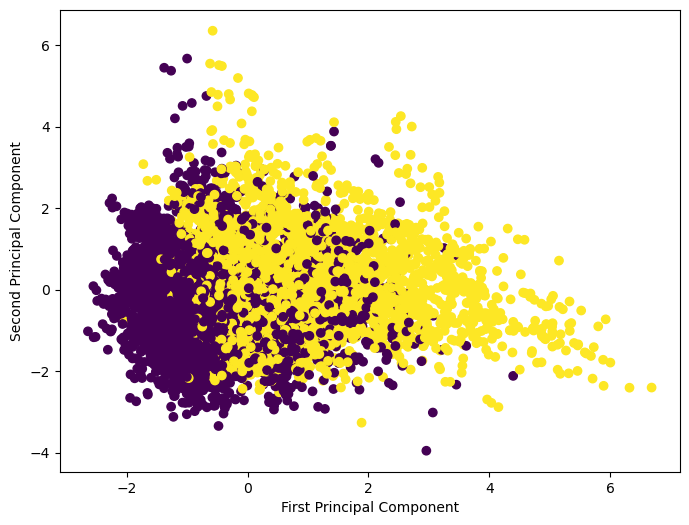

In [210]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=rent_dataset_numeric_pca['ac'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Sin embargo, es cierto que estos dos componentes únicamente explican el 30% de la varianza de los datos:

In [211]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1613582 , 0.13044271])

En este caso, para los componentes 1 y 2 las variables más relevantes son las siguientes:

In [212]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns = ['PC1','PC2'], index = rent_dataset_numeric_pca.columns)
df_loadings

,PC1,PC2
rooms,-0.306582,-0.477814
bathrooms,-0.083807,0.502522
balcony,-0.156647,-0.032369
terrace,0.525570,-0.034859
exterior,0.063775,-0.093919
rooftop,0.310598,0.114697
elevator,0.231825,-0.245782
pool,0.383905,-0.028045
ac,0.399751,0.205652
dist_city_center,0.119307,-0.598496


### Conclusiones

Como se ha podido observar mediente el análisis descriptivo y el PCA/Anova:

- Las variables del barrio, el tipo de propiedad y si la vivienda disponde a aire acondicionado afectan en gran medida al precio por metro cuadrado
- Hay otras como si la vivienda dispone de balcón o los años de la misma que también tienen cierta relevancia.
- Sin embargo, otras como la orientación no tienen ninguna incidencia.

## Creación y comparación de modelos

### Bagging

#### Preprocesamiento de los datos

Como el algoritmo *bagging* no permite variables categóricas, el dataset a utilizar será el siguiente:

In [213]:
rent_dataset_numeric.columns

Index(['price', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior',
       'rooftop', 'elevator', 'pool', 'ac', 'dist_city_center',
       'dist_closest_station'],
      dtype='object')

In [214]:
rent_dataset_numeric.isnull().sum() / len(rent_dataset_numeric)

price                   0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
dist_city_center        0.0
dist_closest_station    0.0
dtype: float64

#### Split entre training y test

In [215]:
X = rent_dataset_numeric.drop(['price'], axis = 1)
y = rent_dataset_numeric[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Hiperoptimización de parámetros

En este caso, como se puede observar, los parámetros más óptimos del árbol de decisión que se utilizará como *weak learner* son:

- max_depth = 7
- min_samples_split = 2

In [216]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 9],
                          'min_samples_split': [2, 5, 10]}],
             scoring='r2')

In [217]:
grid_bag.best_params_

{'max_depth': 7, 'min_samples_split': 5}

A continuación, el número ideal de *bags* obtenido es de 50:

In [218]:
# Valores a probar
parameters = {"n_estimators":[1,5,10,20,50,100,200]}

# Incialización del árbol de decisión
decision_tree_model = DecisionTreeClassifier(max_depth = 7, min_samples_split = 5)

# Creación del modelo
bagging_model = BaggingClassifier(decision_tree_model)

# Función Grid search
grid_bag = GridSearchCV(cv = 10, estimator=bagging_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 50}

#### Entrenamiento del modelo

In [219]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 7, min_samples_split = 5), n_estimators = 20)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [220]:
for i, score in enumerate(model["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.2141460183030216
Accuracy for the fold no. 1 on the test set: 0.3166585609745194
Accuracy for the fold no. 2 on the test set: 0.2623841971200743
Accuracy for the fold no. 3 on the test set: 0.3385823380284049
Accuracy for the fold no. 4 on the test set: 0.19393793685211624
Accuracy for the fold no. 5 on the test set: 0.2337388877089719
Accuracy for the fold no. 6 on the test set: 0.35719663202255625
Accuracy for the fold no. 7 on the test set: 0.3257687290776391
Accuracy for the fold no. 8 on the test set: 0.30630391873346474
Accuracy for the fold no. 9 on the test set: 0.39177080069825354


{'whiskers': [<matplotlib.lines.Line2D at 0x7f578e1e2730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f578e1e24c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f578e1d9160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f575a7a8190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f575a7a8ac0>],
 'means': []}

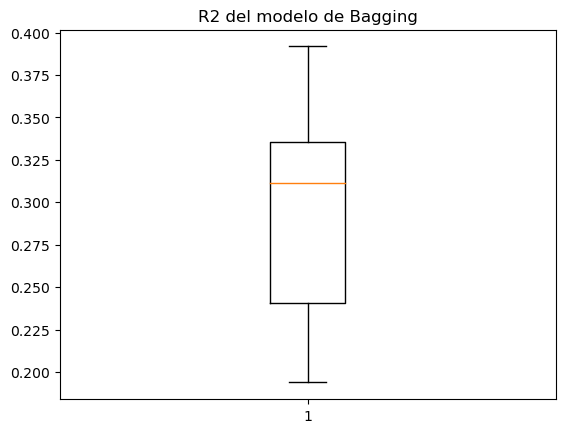

In [221]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(model["test_score"])

#### Comparación de los resultados en training y test

Como se puede observar, el r2 en training es superior al de test, pero ambos son muy bajos. Gráficamente se puede observar una gran dispersión entre los datos de test y los que ha predicho el modelo:

In [222]:
bag.fit(X_train, y_train)

y_pred = bag.predict(X_train)
# Error r2
metrics.r2_score(y_train, y_pred)

0.37181559350887916

In [223]:
y_pred = bag.predict(X_test)
# Error r2
metrics.r2_score(y_test, y_pred)

0.2894757667633925

Text(0, 0.5, 'Test')

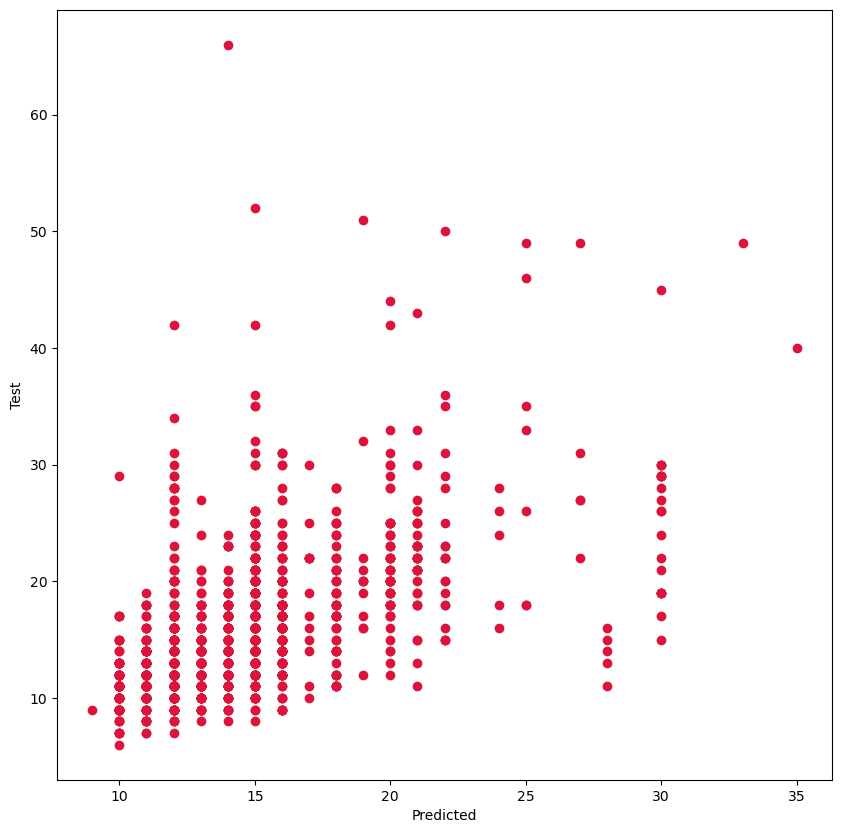

In [224]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test.iloc[:,0], c='crimson')
plt.xlabel("Predicted")
plt.ylabel("Test")

### Random Forest

#### Preprocesamiento de los datos

El algoritmo de *random forest* sí permite aplicar variables categóricas, por lo que en este modelo se utilizarán principalmente dos:

- neighborhood
- property_age_cat

Por tanto, se elimina el resto del dataset (de las que no son 0-1):

In [225]:
cat_features_todrop_randomforest = ['property_type', 'orientation', 'heating', 'floor']
rent_dataset_numeric_randomforest = rent_dataset.drop(cat_features_todrop_randomforest, axis = 1)

El paso siguiente será realizar un *OneHotEncoding* de estas dos variables, ya que aunque sí acepta este tipo de variables, únicamente lo hace si se las informa de esta manera:

In [226]:
# Variables a las que aplicar el OneHotEncoding
cat_features_randomforest = ['neighborhood','property_age_cat']
# Generación del OneHotEnconder
enc = OneHotEncoder(handle_unknown='ignore')

for i in cat_features_randomforest:
    enc_df = pd.DataFrame(enc.fit_transform(rent_dataset_numeric_randomforest[[i]]).toarray())
    enc_df.columns = enc.categories_[0]
    enc_df = enc_df.add_prefix(i + '_')
    rent_dataset_numeric_randomforest = rent_dataset_numeric_randomforest.join(enc_df)
    
# Eliminar las variables iniciales
rent_dataset_numeric_randomforest = rent_dataset_numeric_randomforest.drop(cat_features_randomforest, axis = 1)
rent_dataset_numeric_randomforest.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,...,neighborhood_Vallvidrera - El Tibidabo i les Planes,neighborhood_Verdun,neighborhood_Vila de Gràcia,neighborhood_Vilapicina i la Torre Llobeta,property_age_cat_+150,property_age_cat_0 - 40,property_age_cat_120 - 150,property_age_cat_40 - 70,property_age_cat_70 - 120,property_age_cat_Unknown
0,15,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19,0.05,0.03,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13,0.04,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,16,0.02,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22,0.02,0.02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Llegados a este momento también se puede comprobar como no quedan valores vacíos:

In [227]:
rent_dataset_numeric_randomforest.isnull().sum() / len(rent_dataset_numeric_randomforest)

price                         0.0
rooms                         0.0
bathrooms                     0.0
balcony                       0.0
terrace                       0.0
                             ... 
property_age_cat_0 - 40       0.0
property_age_cat_120 - 150    0.0
property_age_cat_40 - 70      0.0
property_age_cat_70 - 120     0.0
property_age_cat_Unknown      0.0
Length: 94, dtype: float64

#### Split entre training y test

In [228]:
X = rent_dataset_numeric_randomforest.drop(['price'], axis = 1)
y = rent_dataset_numeric_randomforest[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Hiperoptimización de parámetros

Los parámetros más óptimos del árbol de decisión que se utilizará como *weak learner* son:

- max_depth = 15
- n_estimators = 100

In [229]:
# Valores a probar
parameters = [{"n_estimators":[100,150,200], "max_depth": [5,10,15]}]

# Incialización del árbol de decisión
rf_cv = RandomForestClassifier()

# Función Grid search
grid_rf = GridSearchCV(cv = 10, estimator=rf_cv, param_grid=parameters, scoring="r2")
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

{'max_depth': 15, 'n_estimators': 100}

#### Entrenamiento del modelo

A continuación se entrena el modelo con los parámetros calculados previamente:

In [230]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestClassifier(n_estimators = 100, max_depth=15)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(rf, X_train, y_train, cv = 10, scoring = "r2")
for i, score in enumerate(model["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.2601397978519533
Accuracy for the fold no. 1 on the test set: 0.19684947301804234
Accuracy for the fold no. 2 on the test set: 0.23592911452575027
Accuracy for the fold no. 3 on the test set: 0.31371815931498925
Accuracy for the fold no. 4 on the test set: 0.3478154688045383
Accuracy for the fold no. 5 on the test set: 0.2799023028611306
Accuracy for the fold no. 6 on the test set: 0.28256024348143716
Accuracy for the fold no. 7 on the test set: 0.3321433534528978
Accuracy for the fold no. 8 on the test set: 0.2822479975103638
Accuracy for the fold no. 9 on the test set: 0.27205413733544803


{'whiskers': [<matplotlib.lines.Line2D at 0x7f578c07d880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f578c07dfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f578c07d4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f578c07b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f578c07ba90>],
 'means': []}

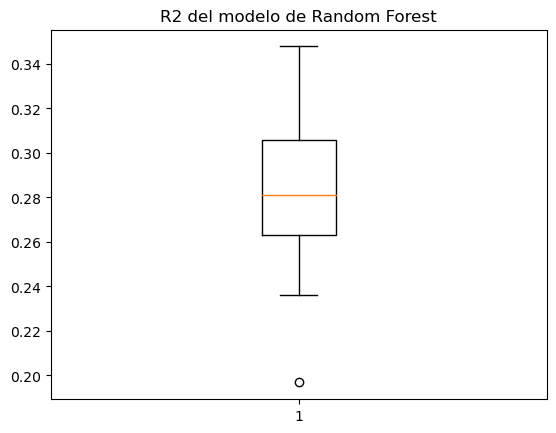

In [231]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Random Forest')
ax1.boxplot(model["test_score"])

#### Comparación de los resultados en training y test

En este caso, el r2 en train es del 93%, pero baja demasiado en test. Por tanto, parece haber cierto sobreentrenamiento del modelo, algo que se tratará de solucionar en el algoritmo de *boosting*:

In [232]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
# Error r2
metrics.r2_score(y_train, y_pred)

0.8158399063686976

In [233]:
y_pred = rf.predict(X_test)
# Error r2
metrics.r2_score(y_test, y_pred)

0.27850020375723883

### Boosting (CatBoost)

#### Preprocesamiento de los datos

En este caso, se intentará eliminar este sobreentrenamiento generando una nueva variable categórica para el barrio. Antes, sin embargo, se eliminarán algunas de ellas por su poca importancia en el precio:

In [234]:
rent_dataset_catboost = rent_dataset

# Se eliminan estas tres variables categóricas debido a su poca importancia
cat_features_todrop_catboost = ['orientation', 'heating', 'floor']
rent_dataset_catboost = rent_dataset_catboost.drop(cat_features_todrop_catboost, axis = 1)
rent_dataset_catboost.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,neighborhood,dist_city_center,property_type,dist_closest_station,property_age_cat
0,15,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Gràcia,2.026455,piso,0.094111,Unknown
1,19,0.05,0.03,1.0,0.0,1.0,0.0,1.0,0.0,1.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,40 - 70
2,13,0.04,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,El Baix Guinardó,2.663025,piso,0.188177,Unknown
3,16,0.02,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,70 - 120
4,22,0.02,0.02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Sarrià-Sant Gervasi,2.727149,piso,0.293784,Unknown


Al graficar el precio se aprecian algunos intervalos de precio bastante definidos, como pueden ser:

- 0-15
- 15-25
- 25-35
- +35

Por tanto, para intentar mejorar la eficiencia del algoritmo se creará una nueva variable llamada *neighbourhood_rent_index* que intentará agrupar los barrios en 4 índices de precios:

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

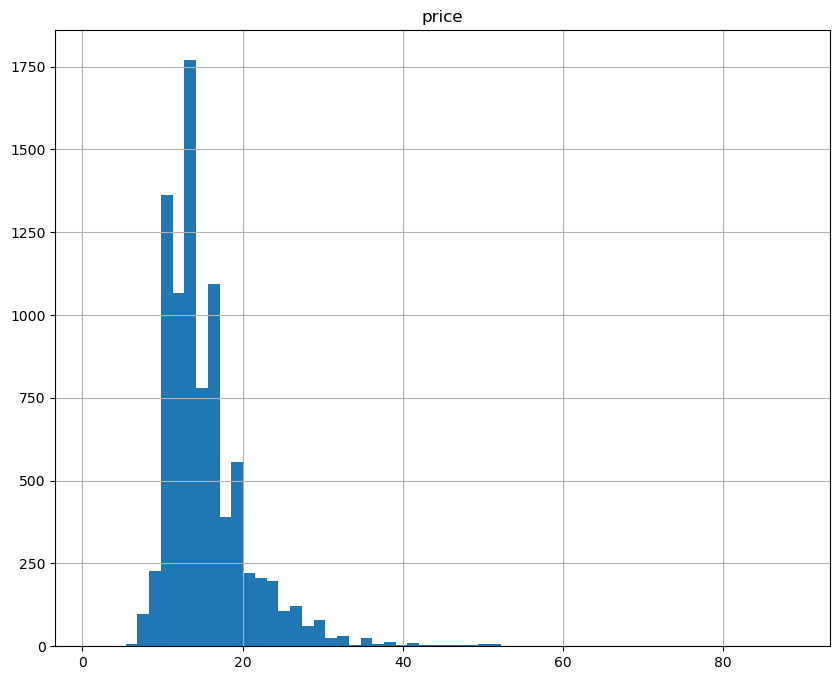

In [235]:
rent_dataset_catboost[['price']].hist(bins=60, figsize=(10, 8))

In [236]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 15)):
        return "0 - 15"
    elif ((x >= 15) & (x < 25)):
        return "15 - 25"
    elif ((x >= 25) & (x < 35)):
        return "25 - 35"
    elif ((x >= 35)):
        return "+35"
    else:
        return "Unknown"

func = np.vectorize(conditions)
rent_dataset_catboost['neighborhood_rent_index'] = func(rent_dataset_catboost['price'])

# Se elimina la variable neighborhood original
rent_dataset_catboost = rent_dataset_catboost.drop('neighborhood', axis = 1)

rent_dataset_catboost.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,dist_city_center,property_type,dist_closest_station,property_age_cat,neighborhood_rent_index
0,15,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.026455,piso,0.094111,Unknown,15 - 25
1,19,0.05,0.03,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.582409,piso,0.902561,40 - 70,15 - 25
2,13,0.04,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.663025,piso,0.188177,Unknown,0 - 15
3,16,0.02,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.910067,piso,0.892917,70 - 120,15 - 25
4,22,0.02,0.02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.727149,piso,0.293784,Unknown,15 - 25


In [237]:
# Como el CatBoost acepta variables categóricas no hay que aplicar el OneHotEncoder, solo informar cuáles son
cat_features_catboost = ['property_type', 'property_age_cat', 'neighborhood_rent_index']
for i in range(0,len(cat_features_catboost)):
    rent_dataset_catboost[cat_features_catboost[i]].astype("category")
rent_dataset_catboost.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,dist_city_center,property_type,dist_closest_station,property_age_cat,neighborhood_rent_index
0,15,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.026455,piso,0.094111,Unknown,15 - 25
1,19,0.05,0.03,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.582409,piso,0.902561,40 - 70,15 - 25
2,13,0.04,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.663025,piso,0.188177,Unknown,0 - 15
3,16,0.02,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.910067,piso,0.892917,70 - 120,15 - 25
4,22,0.02,0.02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.727149,piso,0.293784,Unknown,15 - 25


#### Split entre training y test

In [238]:
# Target and variable
X = rent_dataset_catboost.drop(['price'], axis = 1)
y = rent_dataset_catboost[['price']]
# Split in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# create a train/test split with catboost
d_train_cat = cat.Pool(X_train, y_train, cat_features = cat_features_catboost)
d_test_cat = cat.Pool(X_test, y_test, cat_features = cat_features_catboost)

#### Hiperoptimización de parámetros

Con el siguiente *grid search* se pretenden obtener los valores más óptimos del *learning rate* y el *depth*. Los resultados son:

- learning_rate = 0.03
- depth = 8

**NOTA**: se adjunta la imagen en jpg para que se pueda visualizar el resultado sin ejecutarlo:

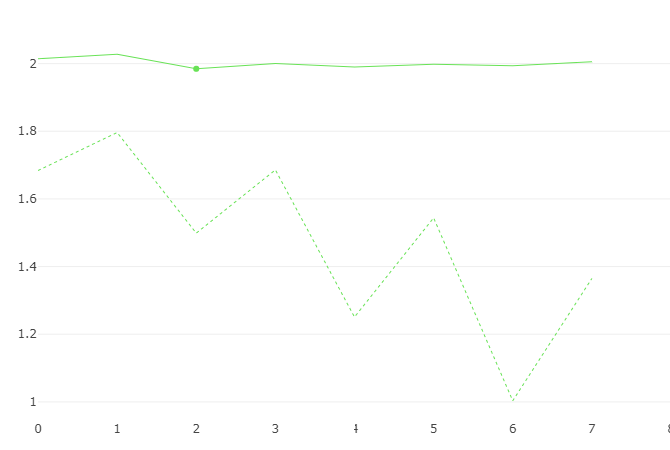

In [239]:
model = cat.CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.015], 'depth': [6, 8, 10, 12]}

grid_search_result = model.grid_search(grid, d_train_cat, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 15.9886974	test: 15.8328865	best: 15.8328865 (0)	total: 9.04ms	remaining: 9.03s
1:	learn: 15.5505387	test: 15.3886943	best: 15.3886943 (1)	total: 17.4ms	remaining: 8.69s
2:	learn: 15.1173118	test: 14.9485119	best: 14.9485119 (2)	total: 20.7ms	remaining: 6.89s
3:	learn: 14.7015989	test: 14.5290081	best: 14.5290081 (3)	total: 25.5ms	remaining: 6.35s
4:	learn: 14.2903581	test: 14.1149185	best: 14.1149185 (4)	total: 29.8ms	remaining: 5.93s
5:	learn: 13.8826349	test: 13.7031920	best: 13.7031920 (5)	total: 34.3ms	remaining: 5.69s
6:	learn: 13.4861698	test: 13.3093733	best: 13.3093733 (6)	total: 38.4ms	remaining: 5.45s
7:	learn: 13.1043133	test: 12.9238074	best: 12.9238074 (7)	total: 43ms	remaining: 5.33s
8:	learn: 12.7343691	test: 12.5501870	best: 12.5501870 (8)	total: 46ms	remaining: 5.07s
9:	learn: 12.3764087	test: 12.1896422	best: 12.1896422 (9)	total: 49.8ms	remaining: 4.93s
10:	learn: 12.0318598	test: 11.8442430	best: 11.8442430 (10)	total: 55.7ms	remaining: 5.01s
11:	learn: 1

In [240]:
grid_search_result['params']

{'depth': 8, 'learning_rate': 0.03}

#### Entrenamiento del modelo

Aplicando los parámetros obtenidos en el apartado anterior, se procede a entrenar el modelo mediante el 10-Fold Cross Validation. Como se puede apreciar, a partir de las 400 iteraciones, aproximadamente, no se percibe mejora en la eficiencia del algoritmo, por lo que será el valor a utilizar:

**NOTA**: se adjunta la imagen en jpg para que se pueda visualizar el resultado sin ejecutarlo:

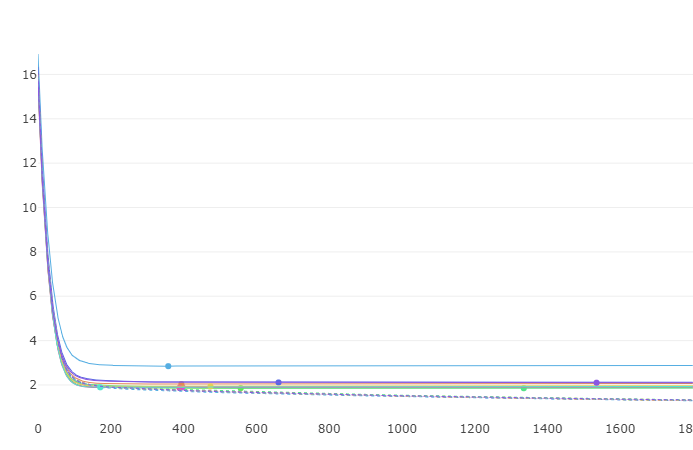

In [241]:
# Model cross validation
params = {"iterations": 1800
          , "depth": 8
          , "loss_function": "RMSE"
          , "learning_rate": 0.03
          , "verbose": False
          , "subsample": 0.7}

scores = cat.cv(d_train_cat
            , params
            , fold_count = 10
            , plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 1.853380957
bestIteration = 557

Training on fold [1/10]

bestTest = 2.84677616
bestIteration = 358

Training on fold [2/10]

bestTest = 1.897903009
bestIteration = 397

Training on fold [3/10]

bestTest = 2.035888661
bestIteration = 394

Training on fold [4/10]

bestTest = 1.852814091
bestIteration = 1335

Training on fold [5/10]

bestTest = 2.112329364
bestIteration = 661

Training on fold [6/10]

bestTest = 1.874356255
bestIteration = 389

Training on fold [7/10]

bestTest = 1.933521991
bestIteration = 474

Training on fold [8/10]

bestTest = 1.893649935
bestIteration = 171

Training on fold [9/10]

bestTest = 2.101454577
bestIteration = 1535



Finalmente, el modelo generado es el siguiente:

In [242]:
model_cat = cat.CatBoostRegressor(iterations = 400
                                  , learning_rate = 0.03
                                  , loss_function = "RMSE"
                                  , random_seed = 2
                                  , depth = 8
                                  , subsample=0.7)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=500
                , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5.3762123	test: 5.5858866	best: 5.5858866 (0)	total: 5.8ms	remaining: 2.31s
399:	learn: 1.7326676	test: 2.0514967	best: 2.0415577 (237)	total: 3.53s	remaining: 0us

bestTest = 2.041557692
bestIteration = 237

Shrink model to first 238 iterations.


#### Comparación de los resultados en training y test

Con estos cambios, como se puede apreciar, se ha conseguido una accuracy del modelo muy alta tanto en train como en test:

In [243]:
y_pred = model_cat.predict(X_train)
#error rate
metrics.r2_score(y_train, y_pred)

0.8883282403610695

In [244]:
y_pred = model_cat.predict(X_test)
# Error r2
metrics.r2_score(y_test, y_pred)

0.8728539089601624

De hecho, la variable más importante, de largo, es la creada para este modelo (el índice de precio del barrio), algo que se puede ver si se grafica la salida el y_pred

Text(0, 0.5, 'Test')

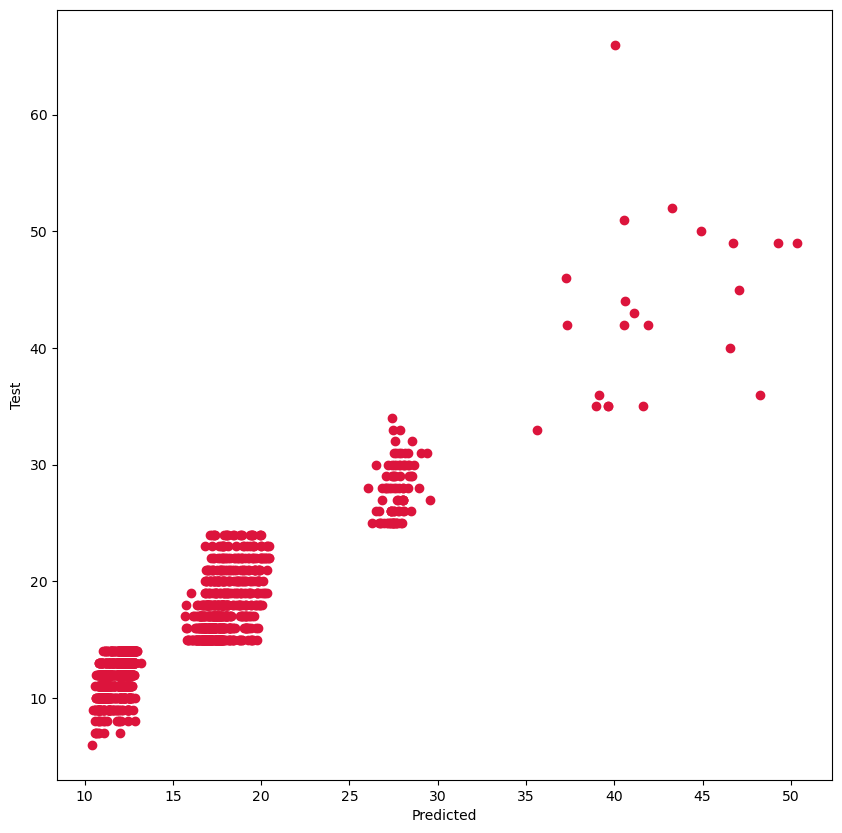

In [245]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test.iloc[:,0], c='crimson')
plt.xlabel("Predicted")
plt.ylabel("Test")

In [246]:
cat_importance = pd.DataFrame({"Features": model_cat.feature_names_
                               , "Importance": model_cat.feature_importances_}
                             ).sort_values('Importance', ascending=False)
cat_importance

,Features,Importance
13,neighborhood_rent_index,80.911545
1,bathrooms,7.261205
9,dist_city_center,3.110629
11,dist_closest_station,1.953926
0,rooms,1.522709
8,ac,1.208751
7,pool,0.984129
12,property_age_cat,0.740397
6,elevator,0.729009
3,terrace,0.695189


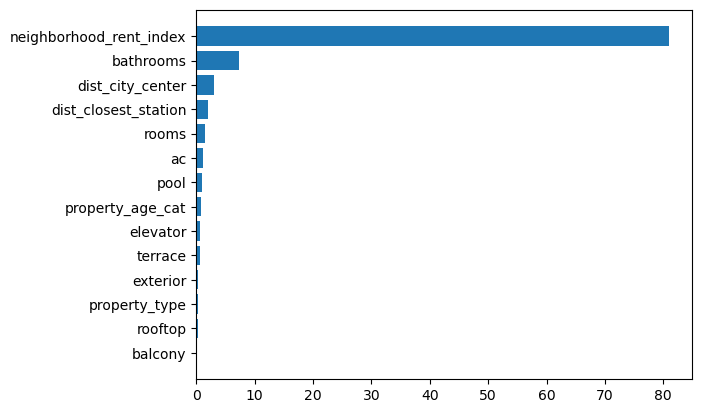

In [247]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y = 'Features'
        , width = 'Importance'
        , data = cat_importance)
ax.invert_yaxis()  # labels read top-to-bottom

## Análisis de Shap Values para el modelo de boosting escogido

El primer paso será aplicar el *TreeExplainer* al modelo de *Boosting* generado previamente:

In [248]:
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat.shap_values(X_train)

El resultado es un ejemplo como este:

In [249]:
print("CATBoost Shap visualization for instance 0")
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0,:], X_train.iloc[410,:])

CATBoost Shap visualization for instance 0


Analizando el modelo en general se ve que:

- A mayor número de baños mayor precio
- A menor distancia del centro mayor precio
- El hecho de tener aire acondicionado aumenta el precio
- Disponer de piscina aumenta el precio

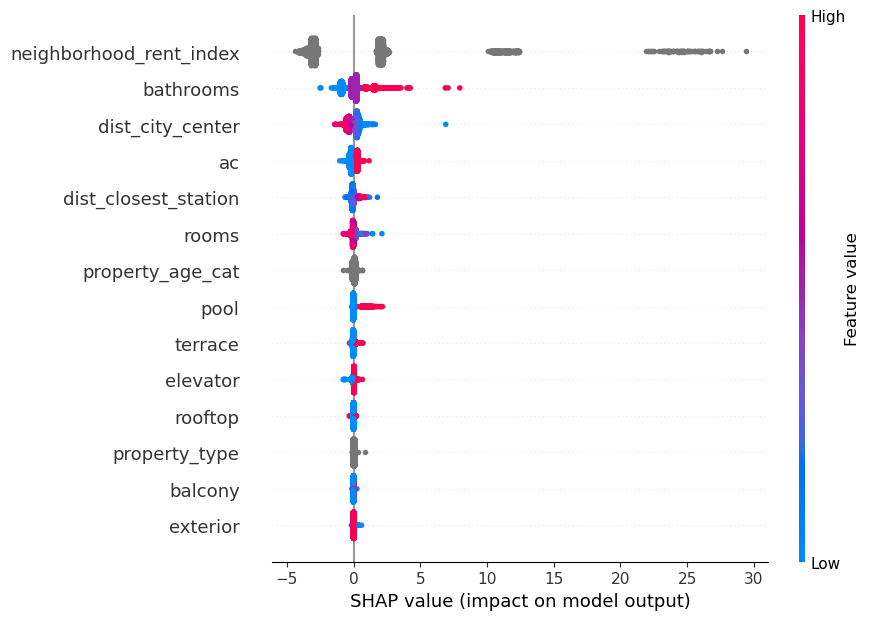

In [250]:
shap.summary_plot(shap_values_cat, X_train)

Viendo cada uno en detalle, las conclusiones más importantes son las siguientes:

- Cuando el índice de precios es +35, el precio es significativamente diferente al resto. Sin embargo, ya se aprecia un aumento en el precio a medida que aumenta ese índice de precios. También se ve como la mayoría de viviendas sin aire acondicionado pertenecen al segmento entre 0-15 €/m2
- La mayoría de viviendas con un índice de precio más bajo está más lejos del centro, al igual que sucede con la distancia a la estación más cercana

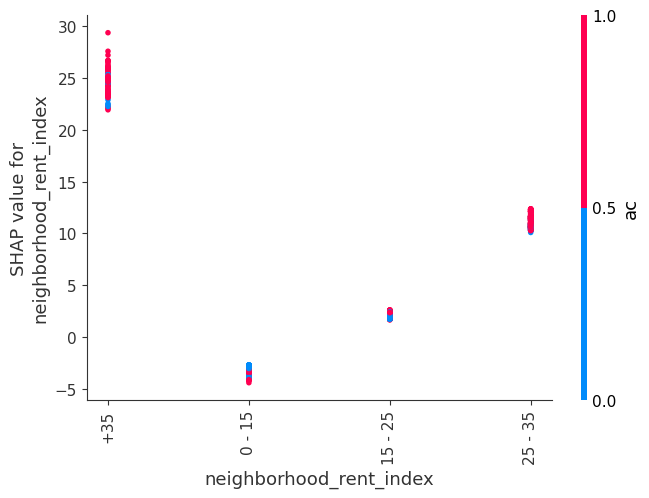

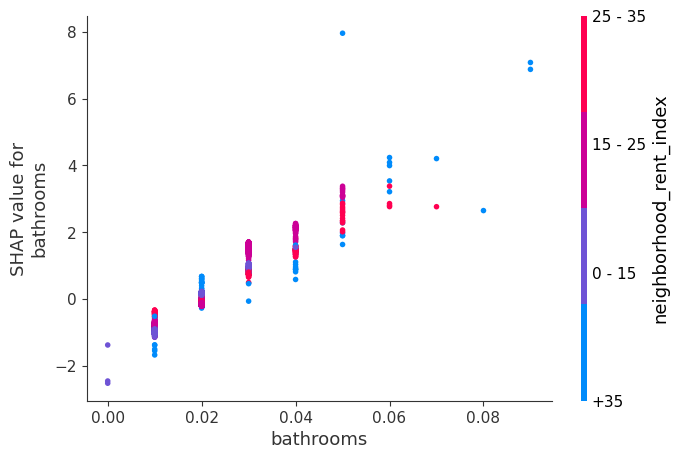

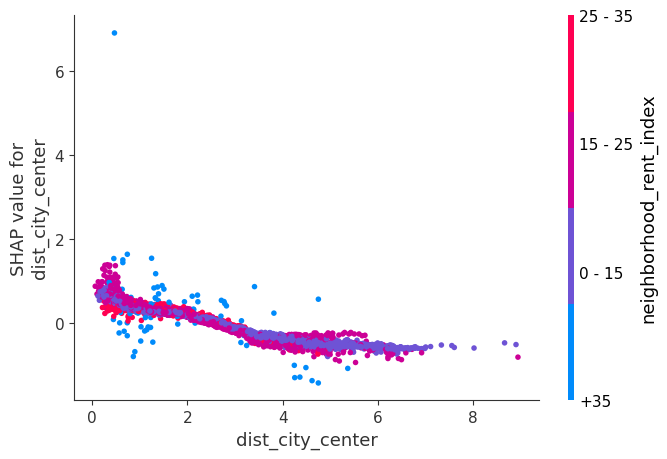

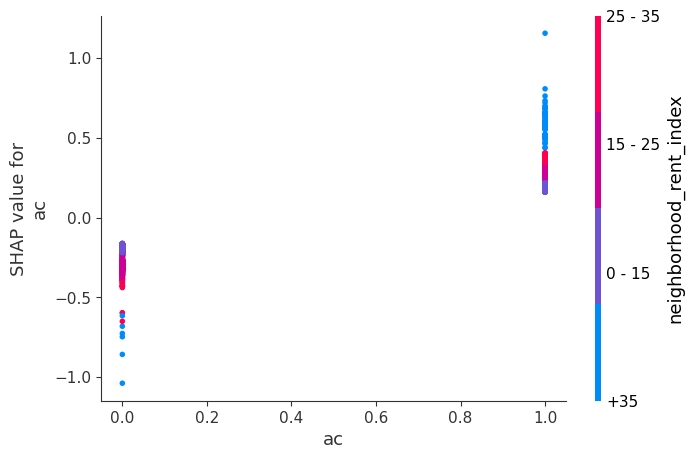

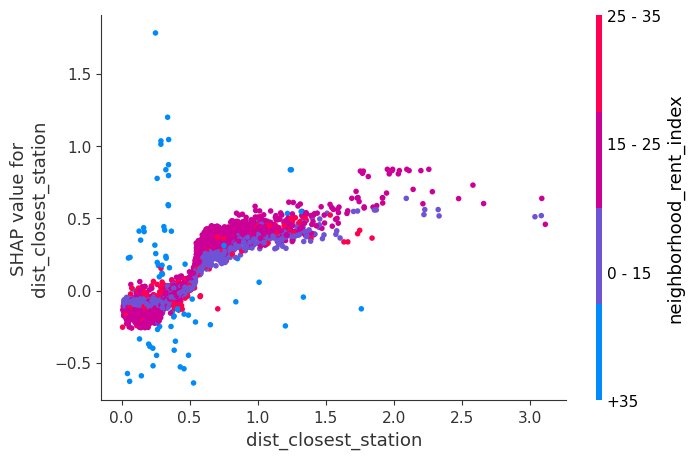

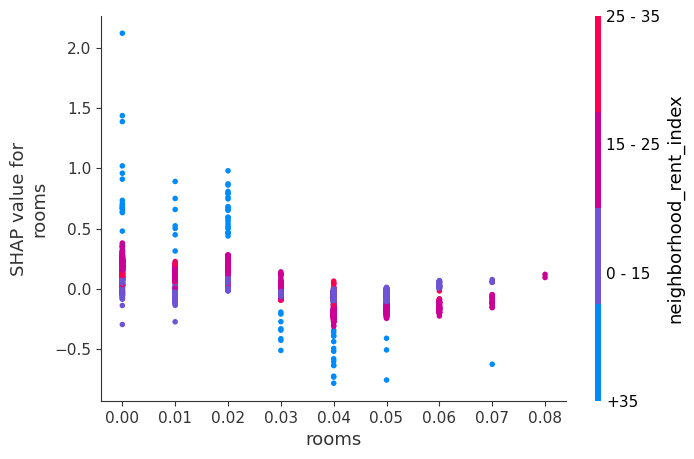

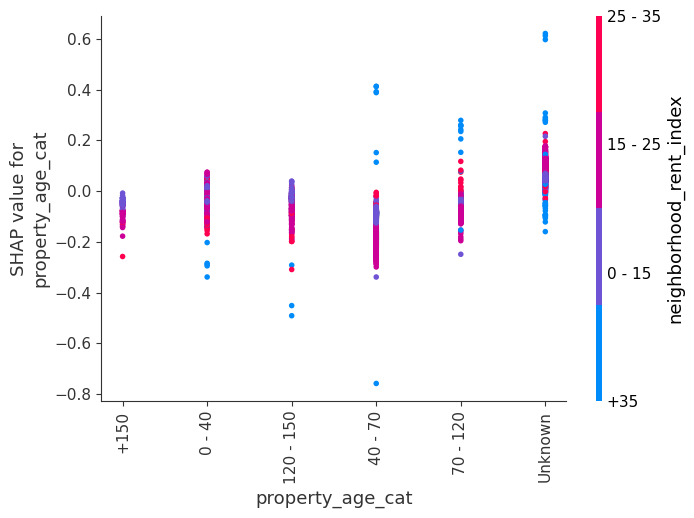

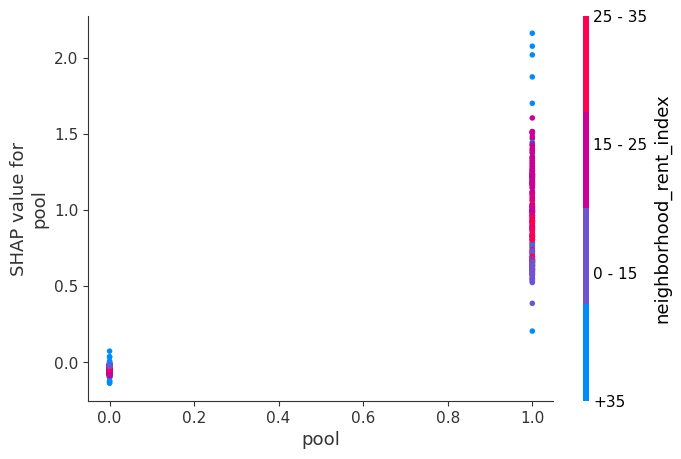

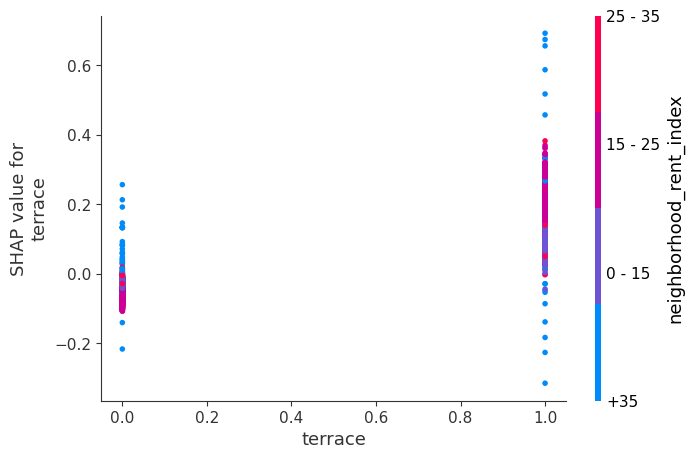

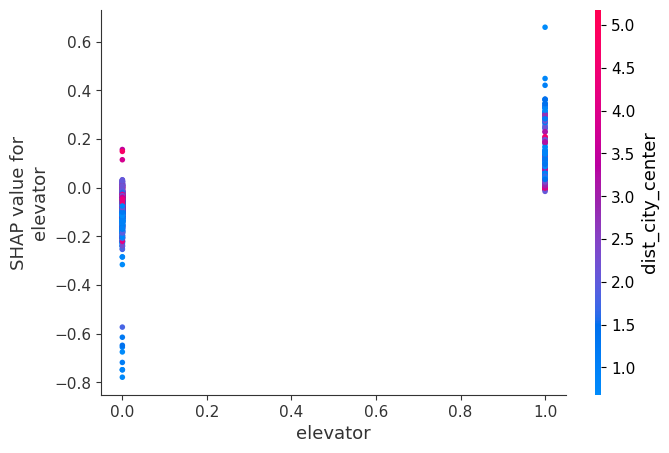

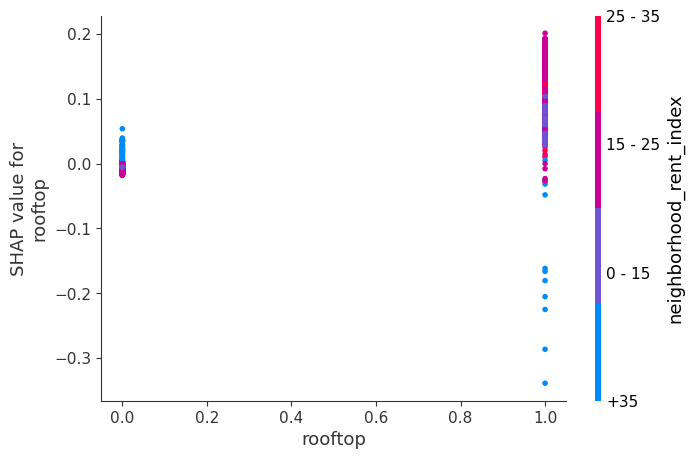

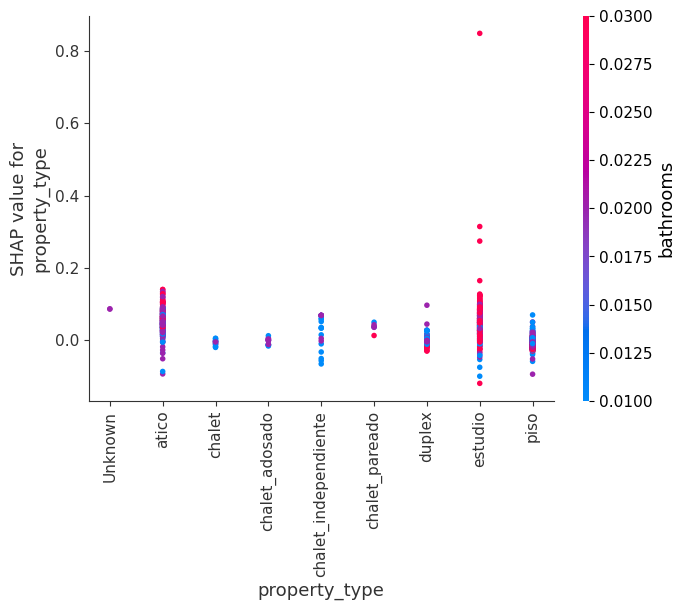

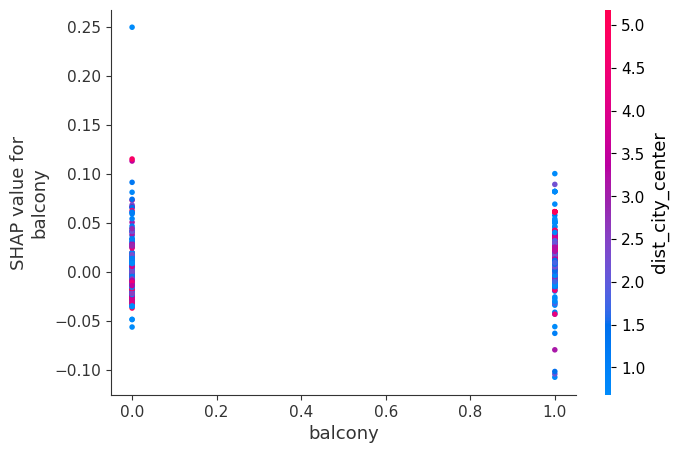

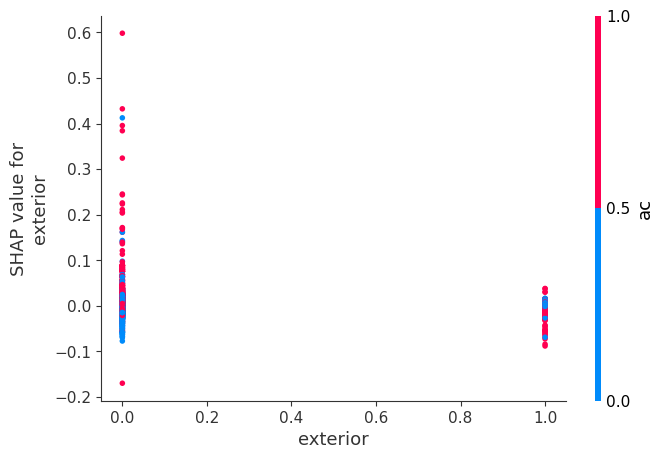

In [251]:
top_inds = np.argsort(-np.sum(np.abs(shap_values_cat), 0))

for i in range(0,len(top_inds)):
    shap.dependence_plot(top_inds[i], shap_values_cat, X_train)

## Generación de predicciones en el dataset de venta y selección de las 20 viviendas más rentables y baratas para comprar

#### Preparación del dataset de venta de pisos

El primer paso será cargar el dataset de venta y dejar únicamente las variables predictoras utilizadas para el modelo de CatBoost:

In [252]:
raw_data_sale = pd.read_csv('processed_sale_Barcelona.csv', delimiter = ',')
raw_data_sale.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,320294,150000,€,41.459649,2.174793,63.0,67,3,1,NaN,...,Ciutat Meridiana - Torre Baró - Vallbona,7.990993,NaN,NaN,piso,NaN,Ciutat Meridiana,0.121438,9/3/2021 10:16,11/12/2021 13:50
1,1786997,150000,€,41.422081,2.155370,48.0,52,2,1,NaN,...,El Carmel,3.991000,NaN,NaN,piso,NaN,El Carmel,0.277336,9/3/2021 10:16,11/12/2021 13:50
2,1787143,395000,€,41.402928,2.207851,84.0,91,2,2,NaN,...,El Poblenou,3.579261,NaN,NaN,duplex,NaN,Poblenou,0.383878,8/30/2021 12:17,8/30/2021 12:17
3,1976767,540000,€,41.394692,2.144422,NaN,100,3,1,NaN,...,Sant Gervasi - Galvany,2.257852,NaN,1.0,piso,NaN,Hospital Clínic,0.875652,9/1/2021 14:04,9/2/2021 13:50
4,27972575,650000,€,41.398971,2.120754,NaN,141,3,2,NaN,...,Sarrià,4.283368,NaN,1.0,piso,NaN,Maria Cristina,1.310073,8/29/2021 11:47,9/2/2021 11:01


In [253]:
raw_data_sale['price'] = round(raw_data_sale['price'] / raw_data_sale['sq_meters_built'], 2).astype(int)
raw_data_sale['rooms'] = round(raw_data_sale['rooms'] / raw_data_sale['sq_meters_built'], 2)
raw_data_sale['bathrooms'] = round(raw_data_sale['bathrooms'] / raw_data_sale['sq_meters_built'], 2)
raw_data_sale.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,320294,2238,€,41.459649,2.174793,63.0,67,0.04,0.01,NaN,...,Ciutat Meridiana - Torre Baró - Vallbona,7.990993,NaN,NaN,piso,NaN,Ciutat Meridiana,0.121438,9/3/2021 10:16,11/12/2021 13:50
1,1786997,2884,€,41.422081,2.155370,48.0,52,0.04,0.02,NaN,...,El Carmel,3.991000,NaN,NaN,piso,NaN,El Carmel,0.277336,9/3/2021 10:16,11/12/2021 13:50
2,1787143,4340,€,41.402928,2.207851,84.0,91,0.02,0.02,NaN,...,El Poblenou,3.579261,NaN,NaN,duplex,NaN,Poblenou,0.383878,8/30/2021 12:17,8/30/2021 12:17
3,1976767,5400,€,41.394692,2.144422,NaN,100,0.03,0.01,NaN,...,Sant Gervasi - Galvany,2.257852,NaN,1.0,piso,NaN,Hospital Clínic,0.875652,9/1/2021 14:04,9/2/2021 13:50
4,27972575,4609,€,41.398971,2.120754,NaN,141,0.02,0.01,NaN,...,Sarrià,4.283368,NaN,1.0,piso,NaN,Maria Cristina,1.310073,8/29/2021 11:47,9/2/2021 11:01


In [254]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 15)):
        return "0 - 15"
    elif ((x >= 15) & (x < 25)):
        return "15 - 25"
    elif ((x >= 25) & (x < 35)):
        return "25 - 35"
    elif ((x >= 35)):
        return "+35"
    else:
        return "Unknown"

func = np.vectorize(conditions)
raw_data_sale['neighborhood_rent_index'] = func(raw_data_sale['price'])

# Se elimina la variable neighborhood original
raw_data_sale = raw_data_sale.drop('neighborhood', axis = 1)

raw_data_sale.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen,neighborhood_rent_index
0,320294,2238,€,41.459649,2.174793,63.0,67,0.04,0.01,NaN,...,7.990993,NaN,NaN,piso,NaN,Ciutat Meridiana,0.121438,9/3/2021 10:16,11/12/2021 13:50,+35
1,1786997,2884,€,41.422081,2.155370,48.0,52,0.04,0.02,NaN,...,3.991000,NaN,NaN,piso,NaN,El Carmel,0.277336,9/3/2021 10:16,11/12/2021 13:50,+35
2,1787143,4340,€,41.402928,2.207851,84.0,91,0.02,0.02,NaN,...,3.579261,NaN,NaN,duplex,NaN,Poblenou,0.383878,8/30/2021 12:17,8/30/2021 12:17,+35
3,1976767,5400,€,41.394692,2.144422,NaN,100,0.03,0.01,NaN,...,2.257852,NaN,1.0,piso,NaN,Hospital Clínic,0.875652,9/1/2021 14:04,9/2/2021 13:50,+35
4,27972575,4609,€,41.398971,2.120754,NaN,141,0.02,0.01,NaN,...,4.283368,NaN,1.0,piso,NaN,Maria Cristina,1.310073,8/29/2021 11:47,9/2/2021 11:01,+35


In [255]:
sale_dataset = raw_data_sale[['price', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built', 'neighborhood_rent_index', 'dist_city_center', 'property_type', 'dist_closest_station']]
sale_dataset.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station
0,2238,0.04,0.01,NaN,1.0,1.0,este,5.0,NaN,0.0,NaN,1.0,NaN,NaN,+35,7.990993,piso,0.121438
1,2884,0.04,0.02,NaN,NaN,1.0,NaN,3.0,NaN,0.0,NaN,1.0,individual,NaN,+35,3.991000,piso,0.277336
2,4340,0.02,0.02,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,1.0,electric,NaN,+35,3.579261,duplex,0.383878
3,5400,0.03,0.01,NaN,NaN,1.0,sur,1.0,NaN,1.0,NaN,1.0,NaN,NaN,+35,2.257852,piso,0.875652
4,4609,0.02,0.01,NaN,NaN,1.0,este,1.0,NaN,1.0,NaN,1.0,NaN,NaN,+35,4.283368,piso,1.310073


In [256]:
features_to_null = ['balcony', 'terrace', 'exterior', 'rooftop', 'elevator', 'pool', 'ac']
for i in range(0,len(features_to_null)):
   sale_dataset[features_to_null[i]].fillna(0, inplace = True) 
sale_dataset.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station
0,2238,0.04,0.01,0.0,1.0,1.0,este,5.0,0.0,0.0,0.0,1.0,NaN,NaN,+35,7.990993,piso,0.121438
1,2884,0.04,0.02,0.0,0.0,1.0,NaN,3.0,0.0,0.0,0.0,1.0,individual,NaN,+35,3.991000,piso,0.277336
2,4340,0.02,0.02,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,electric,NaN,+35,3.579261,duplex,0.383878
3,5400,0.03,0.01,0.0,0.0,1.0,sur,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,2.257852,piso,0.875652
4,4609,0.02,0.01,0.0,0.0,1.0,este,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,4.283368,piso,1.310073


In [257]:
sale_dataset['property_age'] = 2022 - sale_dataset['year_built']
sale_dataset.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age
0,2238,0.04,0.01,0.0,1.0,1.0,este,5.0,0.0,0.0,0.0,1.0,NaN,NaN,+35,7.990993,piso,0.121438,NaN
1,2884,0.04,0.02,0.0,0.0,1.0,NaN,3.0,0.0,0.0,0.0,1.0,individual,NaN,+35,3.991000,piso,0.277336,NaN
2,4340,0.02,0.02,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,electric,NaN,+35,3.579261,duplex,0.383878,NaN
3,5400,0.03,0.01,0.0,0.0,1.0,sur,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,2.257852,piso,0.875652,NaN
4,4609,0.02,0.01,0.0,0.0,1.0,este,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,4.283368,piso,1.310073,NaN


In [258]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
sale_dataset['property_age_cat'] = func(sale_dataset['property_age'])
sale_dataset.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age,property_age_cat
0,2238,0.04,0.01,0.0,1.0,1.0,este,5.0,0.0,0.0,0.0,1.0,NaN,NaN,+35,7.990993,piso,0.121438,NaN,Unknown
1,2884,0.04,0.02,0.0,0.0,1.0,NaN,3.0,0.0,0.0,0.0,1.0,individual,NaN,+35,3.991000,piso,0.277336,NaN,Unknown
2,4340,0.02,0.02,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,electric,NaN,+35,3.579261,duplex,0.383878,NaN,Unknown
3,5400,0.03,0.01,0.0,0.0,1.0,sur,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,2.257852,piso,0.875652,NaN,Unknown
4,4609,0.02,0.01,0.0,0.0,1.0,este,1.0,0.0,1.0,0.0,1.0,NaN,NaN,+35,4.283368,piso,1.310073,NaN,Unknown


In [259]:
features_to_unknown = ['property_type', 'orientation', 'heating', 'property_age_cat', 'floor']

for i in range(0,len(features_to_unknown)):
    sale_dataset[features_to_unknown[i]].fillna("Unknown", inplace = True) 
sale_dataset.head()

,price,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age,property_age_cat
0,2238,0.04,0.01,0.0,1.0,1.0,este,5.0,0.0,0.0,0.0,1.0,Unknown,NaN,+35,7.990993,piso,0.121438,NaN,Unknown
1,2884,0.04,0.02,0.0,0.0,1.0,Unknown,3.0,0.0,0.0,0.0,1.0,individual,NaN,+35,3.991000,piso,0.277336,NaN,Unknown
2,4340,0.02,0.02,0.0,0.0,1.0,Unknown,Unknown,0.0,0.0,0.0,1.0,electric,NaN,+35,3.579261,duplex,0.383878,NaN,Unknown
3,5400,0.03,0.01,0.0,0.0,1.0,sur,1.0,0.0,1.0,0.0,1.0,Unknown,NaN,+35,2.257852,piso,0.875652,NaN,Unknown
4,4609,0.02,0.01,0.0,0.0,1.0,este,1.0,0.0,1.0,0.0,1.0,Unknown,NaN,+35,4.283368,piso,1.310073,NaN,Unknown


In [260]:
sale_cat_features = ['orientation', 'heating']
sale_dataset_numeric = sale_dataset.drop(sale_cat_features, axis = 1)
sale_dataset_numeric

,price,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,pool,ac,year_built,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age,property_age_cat
0,2238,0.04,0.01,0.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,NaN,+35,7.990993,piso,0.121438,NaN,Unknown
1,2884,0.04,0.02,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,NaN,+35,3.991000,piso,0.277336,NaN,Unknown
2,4340,0.02,0.02,0.0,0.0,1.0,Unknown,0.0,0.0,0.0,1.0,NaN,+35,3.579261,duplex,0.383878,NaN,Unknown
3,5400,0.03,0.01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,+35,2.257852,piso,0.875652,NaN,Unknown
4,4609,0.02,0.01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,+35,4.283368,piso,1.310073,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,2317,0.03,0.02,0.0,0.0,0.0,Unknown,0.0,1.0,0.0,1.0,1962.0,+35,4.750976,piso,0.341163,60.0,40 - 70
5843,2323,0.03,0.03,0.0,1.0,0.0,Unknown,0.0,0.0,0.0,0.0,NaN,+35,7.346138,piso,0.280344,NaN,Unknown
5844,2830,0.00,0.03,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,1.0,NaN,+35,0.971988,estudio,0.157078,NaN,Unknown
5845,1898,0.04,0.01,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,NaN,+35,7.019433,piso,0.440968,NaN,Unknown


Finalmente, el listado de variables es el mismo y no hay ningún valor nulo:

In [261]:
sale_dataset_numeric_no_nulls = sale_dataset_numeric.drop(['year_built', 'property_age', 'floor'], axis = 1)
sale_dataset_numeric_no_nulls.isnull().sum() / len(sale_dataset_numeric_no_nulls)

price                      0.0
rooms                      0.0
bathrooms                  0.0
balcony                    0.0
terrace                    0.0
exterior                   0.0
rooftop                    0.0
elevator                   0.0
pool                       0.0
ac                         0.0
neighborhood_rent_index    0.0
dist_city_center           0.0
property_type              0.0
dist_closest_station       0.0
property_age_cat           0.0
dtype: float64

In [262]:
sale_dataset_numeric_no_nulls.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age_cat
0,2238,0.04,0.01,0.0,1.0,1.0,0.0,0.0,0.0,1.0,+35,7.990993,piso,0.121438,Unknown
1,2884,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,+35,3.991000,piso,0.277336,Unknown
2,4340,0.02,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,+35,3.579261,duplex,0.383878,Unknown
3,5400,0.03,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,+35,2.257852,piso,0.875652,Unknown
4,4609,0.02,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,+35,4.283368,piso,1.310073,Unknown


In [263]:
# Generación del dataset para generar la predicción

X_sale = sale_dataset_numeric_no_nulls.drop(['price'], axis = 1)
y_sale = sale_dataset_numeric_no_nulls[['price']]

In [264]:
for i in range(0,len(cat_features_catboost)):
    X_sale[cat_features_catboost[i]].astype("category")
X_sale.head()

,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age_cat
0,0.04,0.01,0.0,1.0,1.0,0.0,0.0,0.0,1.0,+35,7.990993,piso,0.121438,Unknown
1,0.04,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,+35,3.991000,piso,0.277336,Unknown
2,0.02,0.02,0.0,0.0,1.0,0.0,0.0,0.0,1.0,+35,3.579261,duplex,0.383878,Unknown
3,0.03,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,+35,2.257852,piso,0.875652,Unknown
4,0.02,0.01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,+35,4.283368,piso,1.310073,Unknown


In [265]:
# Se ordenan las columnas en el mismo orden para que la predicción no de error

X_sale = X_sale[['rooms','bathrooms', 'balcony', 'terrace', 'exterior', 'rooftop', 'elevator', 'pool',
                'ac', 'dist_city_center', 'property_type', 'dist_closest_station', 'property_age_cat',
                'neighborhood_rent_index']]

#### Generación de las predicciones

Se genera la predicción y se incorpora al dataset:

In [266]:
sale_dataset_numeric_no_nulls['rent_predict'] = model_cat.predict(X_sale)
sale_dataset_numeric_no_nulls['meters'] = raw_data_sale['sq_meters_built']

#### Break-even

Se crea un índice de inversión que divia el €/m2 de venta entre el €/m2 de alquiler para obtener el *break-even time*:

In [267]:
sale_dataset_numeric_no_nulls['invest_index'] = sale_dataset_numeric_no_nulls['price'] / sale_dataset_numeric_no_nulls['rent_predict']

#### Selección de las 20 mejores inversiones

In [268]:
sale_dataset_numeric_no_nulls = sale_dataset_numeric_no_nulls.sort_values('invest_index', ascending=True)
best_investments = sale_dataset_numeric_no_nulls.head(20)

In [269]:
best_investments.head()

,price,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,neighborhood_rent_index,dist_city_center,property_type,dist_closest_station,property_age_cat,rent_predict,meters,invest_index
410,362,0.05,0.02,1.0,0.0,0.0,0.0,1.0,0.0,0.0,+35,1.984758,piso,0.427798,40 - 70,40.633179,80,8.908976
1800,486,0.04,0.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,+35,2.852830,piso,0.312926,40 - 70,36.605613,72,13.276652
1218,550,0.03,0.02,1.0,0.0,0.0,0.0,1.0,0.0,1.0,+35,4.745571,piso,0.394894,0 - 40,38.958001,118,14.117767
2896,608,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,+35,7.435571,piso,0.450793,Unknown,35.195137,46,17.275114
3408,673,0.04,0.02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,+35,2.835212,piso,0.253943,Unknown,37.511705,52,17.941067


Como se puede apreciar:

- Las 20 viviendas se sitúan en una zona con índice de precios +35 €/m2
- Son propiedades antiguas
- De tipo piso

Es decir, el algoritmo encuentra viviendas que a pesar de ser antiguas, están situadas en barrios caros, por lo que se supone que su precio también lo debería ser:

In [270]:
best_investments.describe(include='object')

,neighborhood_rent_index,property_type,property_age_cat
count,20,20,20
unique,1,5,4
top,+35,piso,40 - 70
freq,20,13,8


De hecho, la mejor inversión es la siguiente vivienda. Su precio de venta es de 29000€ en la plataforma y el modelo predice que se podrían pagar +2000 € al mes. Lo mismo pasa con la segunda mejor:

In [271]:
raw_data_sale = pd.read_csv('processed_sale_Barcelona.csv', delimiter = ',')
raw_data_sale_org.iloc[410,:]

id                             90230172
price                             29000
currency                              €
latitude                      41.373778
longitude                      2.155383
sq_meters                          70.0
sq_meters_built                      80
rooms                                 4
bathrooms                             2
balcony                             1.0
terrace                             NaN
exterior                            NaN
orientation                         NaN
floor                               NaN
rooftop                             NaN
elevator                            1.0
doorman                             NaN
pool                                NaN
ac                                  NaN
heating                      individual
year_built                       1974.0
quality                               2
city                          Barcelona
neighborhood             Sants-Montjuïc
dist_city_center               1.984758


In [272]:
raw_data_sale_org.iloc[1800,:]

id                                              94152050
price                                              35000
currency                                               €
latitude                                       41.413491
longitude                                       2.172196
sq_meters                                            NaN
sq_meters_built                                       72
rooms                                                  3
bathrooms                                              1
balcony                                              NaN
terrace                                              NaN
exterior                                             NaN
orientation                                          NaN
floor                                                NaN
rooftop                                              NaN
elevator                                             1.0
doorman                                              NaN
pool                           

## Resultados finales, conclusiones y vías abiertas

Como se ha podido apreciar, el modelo de *Boosting* generado tiene una *accuracy* ciertamente buena tanto en train como en test, por lo que por lo general es uno bueno. Sin embargo, **se le da demasiado peso al índice de precios del barrio, por lo que una vivienda barata en un barrio caro suele ser la mejor inversión**.

De esta conclusión se extraen algunas vías abiertas de mejora como podrían ser:

- Penalizar a aquellas viviendas que tengan muchos valores nulos, porque en las mejores inversiones, por ejemplo, hay muchos valores nulos. Aquellas que tengan más información serán las mejores, porque a nivel de negocio se podrá creer más en el resultado del modelo
- En el listado de datos no está incluido el estado de la vivienda. Es probable que si son viviendas muy antiguas en barrios caros, necesiten una reforma integral (de ahí el precio), por lo que quizás sería más interesante buscar aquellas viviendas que no necesiten de ninguna inversión extra aparte de la propia compra